In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

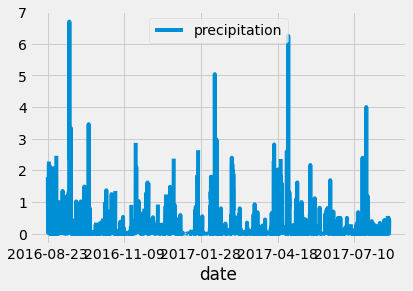

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# print(df)
# print(df.to_string(index=False))
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

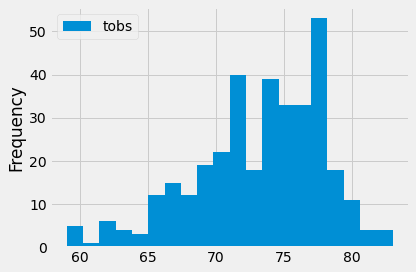

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=20)
plt.tight_layout()

In [23]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(date):
#     return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
#     filter(Measurement.date == date).all()

In [31]:
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [32]:
start_date = str(input("I can help you find the min, max and avg temp for time frame. Please Enter the starting date for your query:"))
end_date = str(input("Your end date:"))
print(f'The min, max and avg temp are: {calc_temps(start_date, end_date)}')

I can help you find the min, max and avg temp for time frame. Please Enter the starting date for your query:2010-01-01
Your end date:2010-02-01
The min, max and avg temp are: [(56.0, 78.0, 69.16908212560386)]


# Challenge

In [18]:
# See all the table columns
for class_instance in session.query(Measurement).all():
    print(vars(class_instance))

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabe7cc5b0>, 'tobs': 65.0, 'prcp': 0.08, 'station': 'USC00519397', 'date': '2010-01-01', 'id': 1}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabf987460>, 'tobs': 63.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2010-01-02', 'id': 2}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabf987490>, 'tobs': 74.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2010-01-03', 'id': 3}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabf9874f0>, 'tobs': 76.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2010-01-04', 'id': 4}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabf987550>, 'tobs': 73.0, 'prcp': None, 'station': 'USC00519397', 'date': '2010-01-06', 'id': 5}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabf9875b0>, 'tobs': 70.0, 'prcp': 0.06, 'station': 'USC00519397', 'date': 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfbbdd00>, 'tobs': 75.0, 'prcp': 0.01, 'station': 'USC00519397', 'date': '2015-04-15', 'id': 1868}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfbbdd90>, 'tobs': 76.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2015-04-16', 'id': 1869}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfbbde20>, 'tobs': 77.0, 'prcp': 0.06, 'station': 'USC00519397', 'date': '2015-04-17', 'id': 1870}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfbbdeb0>, 'tobs': 77.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2015-04-18', 'id': 1871}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfbbdf40>, 'tobs': 75.0, 'prcp': 0.0, 'station': 'USC00519397', 'date': '2015-04-19', 'id': 1872}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfbbdfd0>, 'tobs': 76.0, 'prcp': 0.0, 'station': 'USC00519

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfe30370>, 'tobs': 62.0, 'prcp': 0.8, 'station': 'USC00513117', 'date': '2013-03-11', 'id': 3867}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfe30400>, 'tobs': 66.0, 'prcp': 0.01, 'station': 'USC00513117', 'date': '2013-03-12', 'id': 3868}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfe30490>, 'tobs': 64.0, 'prcp': 0.03, 'station': 'USC00513117', 'date': '2013-03-13', 'id': 3869}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfe30520>, 'tobs': 66.0, 'prcp': 0.0, 'station': 'USC00513117', 'date': '2013-03-14', 'id': 3870}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfe305b0>, 'tobs': 62.0, 'prcp': 0.0, 'station': 'USC00513117', 'date': '2013-03-15', 'id': 3871}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabfe30640>, 'tobs': 74.0, 'prcp': 0.0, 'station': 'USC00513

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabe2e26a0>, 'tobs': 74.0, 'prcp': 0.03, 'station': 'USC00514830', 'date': '2011-06-25', 'id': 5867}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabe2e2f70>, 'tobs': 74.0, 'prcp': None, 'station': 'USC00514830', 'date': '2011-06-27', 'id': 5868}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabe2e2f10>, 'tobs': 71.0, 'prcp': 0.12, 'station': 'USC00514830', 'date': '2011-06-28', 'id': 5869}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabe2e2b20>, 'tobs': 74.0, 'prcp': 0.01, 'station': 'USC00514830', 'date': '2011-07-01', 'id': 5870}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabe2e2a90>, 'tobs': 77.0, 'prcp': None, 'station': 'USC00514830', 'date': '2011-07-03', 'id': 5871}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffabe2e2a30>, 'tobs': 76.0, 'prcp': 0.02, 'station': 'USC0

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac021ef40>, 'tobs': 74.0, 'prcp': 0.0, 'station': 'USC00517948', 'date': '2011-06-07', 'id': 7866}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac021efd0>, 'tobs': 76.0, 'prcp': 0.05, 'station': 'USC00517948', 'date': '2011-06-08', 'id': 7867}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac02250a0>, 'tobs': 76.0, 'prcp': 0.0, 'station': 'USC00517948', 'date': '2011-06-09', 'id': 7868}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac0225130>, 'tobs': 77.0, 'prcp': 0.0, 'station': 'USC00517948', 'date': '2011-06-13', 'id': 7869}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac02251c0>, 'tobs': 77.0, 'prcp': 0.0, 'station': 'USC00517948', 'date': '2011-06-14', 'id': 7870}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac0225250>, 'tobs': 76.0, 'prcp': None, 'station': 'USC00517

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac0491640>, 'tobs': 66.0, 'prcp': 0.0, 'station': 'USC00519523', 'date': '2010-12-17', 'id': 9866}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac04916d0>, 'tobs': 77.0, 'prcp': 0.0, 'station': 'USC00519523', 'date': '2010-12-18', 'id': 9867}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac0491760>, 'tobs': 70.0, 'prcp': 2.86, 'station': 'USC00519523', 'date': '2010-12-19', 'id': 9868}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac04917f0>, 'tobs': 73.0, 'prcp': 4.95, 'station': 'USC00519523', 'date': '2010-12-20', 'id': 9869}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac0491880>, 'tobs': 71.0, 'prcp': 0.63, 'station': 'USC00519523', 'date': '2010-12-21', 'id': 9870}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac0491910>, 'tobs': 71.0, 'prcp': 0.58, 'station': 'USC005

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac06fac70>, 'tobs': 76.0, 'prcp': 0.11, 'station': 'USC00519523', 'date': '2016-09-07', 'id': 11865}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac06fad00>, 'tobs': 79.0, 'prcp': 0.01, 'station': 'USC00519523', 'date': '2016-09-08', 'id': 11866}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac06fad90>, 'tobs': 77.0, 'prcp': 0.23, 'station': 'USC00519523', 'date': '2016-09-09', 'id': 11867}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac06fae20>, 'tobs': 78.0, 'prcp': 0.14, 'station': 'USC00519523', 'date': '2016-09-10', 'id': 11868}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac06faeb0>, 'tobs': 83.0, 'prcp': 0.12, 'station': 'USC00519523', 'date': '2016-09-11', 'id': 11869}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac06faf40>, 'tobs': 78.0, 'prcp': 0.15, 'station': 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac096d370>, 'tobs': 73.0, 'prcp': 0.03, 'station': 'USC00519281', 'date': '2014-08-10', 'id': 13865}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac096d400>, 'tobs': 68.0, 'prcp': 0.0, 'station': 'USC00519281', 'date': '2014-08-11', 'id': 13866}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac096d490>, 'tobs': 72.0, 'prcp': 0.0, 'station': 'USC00519281', 'date': '2014-08-12', 'id': 13867}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac096d520>, 'tobs': 72.0, 'prcp': 0.17, 'station': 'USC00519281', 'date': '2014-08-13', 'id': 13868}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac096d5b0>, 'tobs': 73.0, 'prcp': 0.04, 'station': 'USC00519281', 'date': '2014-08-14', 'id': 13869}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7ffac096d640>, 'tobs': 72.0, 'prcp': 0.02, 'station': 'U

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

